In [10]:
from feedback_grape.fgrape import optimize_pulse
import jax.numpy as jnp
from jax.experimental import sparse

from feedback_grape.utils.operators import sigmam, sigmap, identity
from feedback_grape.utils.tensor import tensor
from matplotlib import pyplot as plt

In [15]:
N_qubits = 6

def map_to_HS(operator, j, N_qubits):
    if j == 0:
        return tensor(operator, identity(2**(N_qubits-j-1)))
    elif j == N_qubits - 1:
        return tensor(identity(2**j), operator)
    else:
        return tensor(identity(2**j), operator, identity(2**(N_qubits-j-1)))

H = jnp.zeros((2**N_qubits, 2**N_qubits), dtype=complex)
for j in range(0,N_qubits):
    sig1 = map_to_HS(jnp.ones((2,2)), j, N_qubits)
    sig2 = map_to_HS(jnp.ones((2,2)), (j+1) % N_qubits, N_qubits)
    interaction = sig1 @ sig2
    H += interaction

    sig2 = map_to_HS(sigmam(), j, N_qubits)
    number = sig1 @ sig2
    #H -= number

H += H.conj().T

print("speedup if nonzero elements ignored: ",(2**N_qubits)**2 / ((2**N_qubits)**2 - jnp.sum(H == 0)))

speedup if nonzero elements ignored:  4.923076923076923


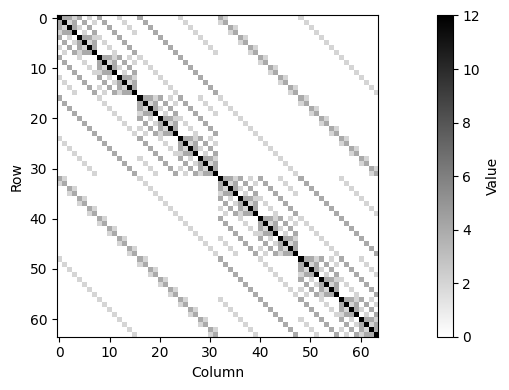

In [16]:
# Plot matrix elements as binary heatmap
mats = [H]

fig, axes = plt.subplots(1, len(mats), figsize=(12, 4))
if len(mats): axes = (axes,)
for i, (mat, ax) in enumerate(zip(mats, axes)):
    im = ax.imshow(jnp.abs(mat), cmap='gray_r', interpolation='nearest')
    fig.colorbar(im, ax=ax, label='Value')
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
plt.tight_layout()
plt.show()